# Mandatory Assignment #01

Applied Machine Learning and Data Engineering in Business Context KAN-CDSCV1008U

Andrea Perez Lopez
Susana Morala Miguel
Maria Magdalena Gomez
Laura Peciulyte

Data set was scraped from airlinequality.com and contains text-based reviews in addition to reviewers' ratings of available dimensions on the website.
Source data: https://www.kaggle.com/datasets/joelljungstrom/128k-airline-reviews?datasetId=3415709

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
data = pd.read_csv('AirlineReviews.csv')
data.shape

(129455, 22)

In [5]:
#Check the data
data.head(3), data.tail(3),

(        Aircraft  AirlineName      CabinType      DateFlown  \
 0            NaN  AB Aviation  Economy Class  November 2019   
 1           E120  AB Aviation  Economy Class      June 2019   
 2  Embraer E120   AB Aviation  Economy Class      June 2019   
 
               DatePub  EntertainmentRating  FoodRating  GroundServiceRating  \
 0  11th November 2019                    0           4                    4   
 1      25th June 2019                    0           1                    1   
 2      25th June 2019                    0           1                    1   
 
    OriginCountry  OverallScore  ...                Route SeatComfortRating  \
 0    Netherlands           9.0  ...     Moroni to Moheli                 4   
 1  UnitedKingdom           1.0  ...    Moroni to Anjouan                 2   
 2  UnitedKingdom           1.0  ...  Anjouan to Dzaoudzi                 2   
 
   ServiceRating         Slug                         Title    TravelType  \
 0             5  ab-avia

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36423 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

In [7]:
# Statistical summary of the numerical data
data.describe()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
count,129455.000000,129455.000000,129455.000000,125124.000000,129455.000000,129455.000000,129455.000000,129455.000000
mean,1.557190,1.989077,1.652010,4.556408,2.470202,2.689622,2.637527,0.453926
std,1.751076,1.774512,1.740252,3.498833,1.620262,1.774499,1.628808,1.078274
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,4.000000,3.000000,8.000000,4.000000,4.000000,4.000000,0.000000
max,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# Check the number missing values in the whole data
data.isna().sum().sort_values(ascending=False)

Aircraft               93032
TripVerified           69947
Route                  38630
DateFlown              38462
TravelType             38309
OverallScore            4331
CabinType               3018
OriginCountry           1678
Review                   824
Title                      4
GroundServiceRating        0
Recommended                0
AirlineName                0
FoodRating                 0
SeatComfortRating          0
ServiceRating              0
Slug                       0
EntertainmentRating        0
DatePub                    0
ValueRating                0
WifiRating                 0
unique_id                  0
dtype: int64

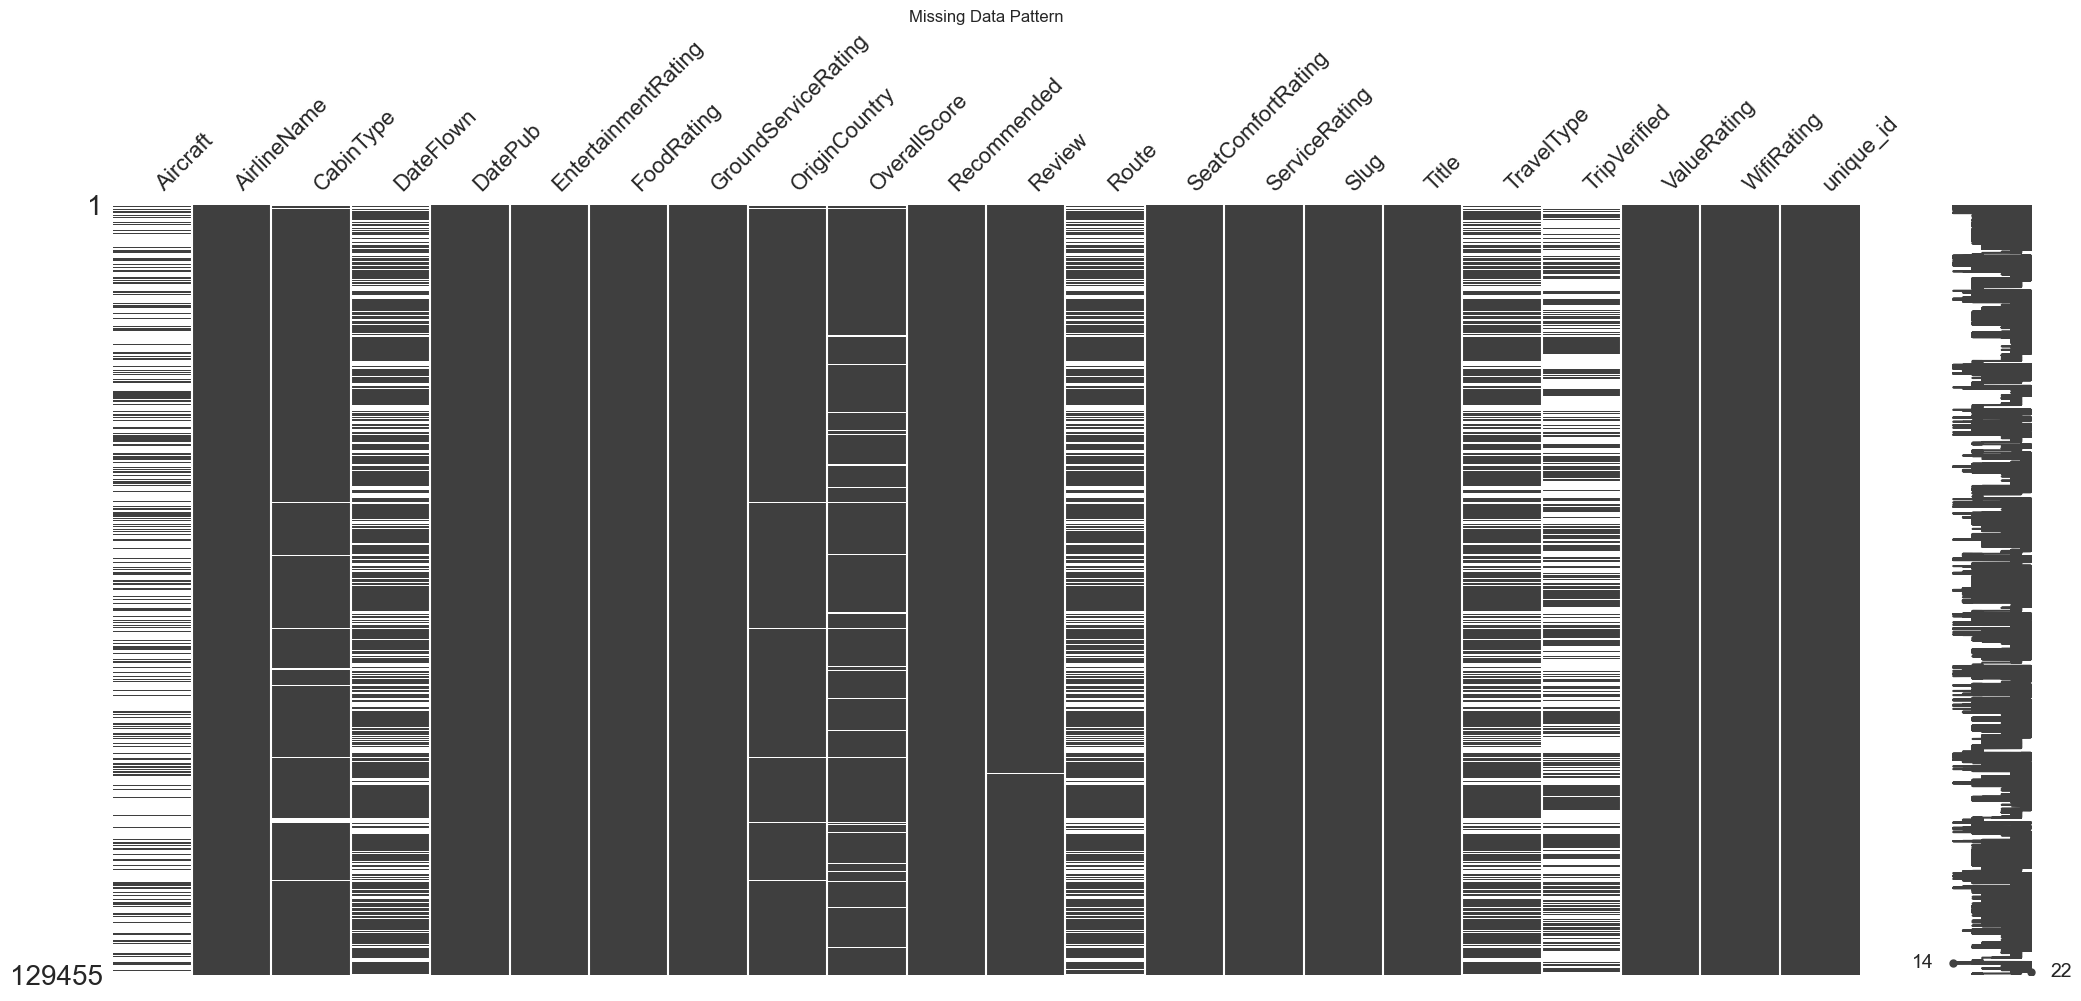

In [9]:
# Create a pattern graph from the missing values
msno.matrix(data)
plt.title('Missing Data Pattern')
plt.show()

In [10]:
#Check for duplicated values
data.duplicated().sum()

0

In [11]:
#Check the columns with the most missing values
data[['TripVerified', 'Aircraft']].isna().sum()

TripVerified    69947
Aircraft        93032
dtype: int64

In [12]:
# Check the number of unique values in each column
data.nunique()

Aircraft                 3632
AirlineName               547
CabinType                   4
DateFlown                 111
DatePub                  5200
EntertainmentRating         6
FoodRating                  6
GroundServiceRating         6
OriginCountry             202
OverallScore               10
Recommended                 2
Review                 128425
Route                   51401
SeatComfortRating           6
ServiceRating               6
Slug                      548
Title                   70975
TravelType                  4
TripVerified                6
ValueRating                 6
WifiRating                  6
unique_id              129455
dtype: int64

The "TripVerified" column contains 6 unique values, which appears to be incorrect. In reality, it should only have two distinct values: 'verified' (Trip Verified) or 'not verified.

In [13]:
data['TripVerified'].unique()

array(['Trip Verified', nan, 'Not Verified',
       'Trip Verified,Trip Verified', 'NotVerified',
       'Not Verified,Not Verified',
       'Chicago to Colorado Springs. Not Verified'], dtype=object)

In [14]:
# Replace the incorrect values
replacement_mapping = {
    'Trip Verified,Trip Verified': 'Trip Verified',
    'NotVerified': 'Not Verified',
    'Not Verified,Not Verified': 'Not Verified',
    'Chicago to Colorado Springs. Not Verified': 'Not Verified'
}
# Replace values in the 'TripVerified' column
data['TripVerified'] = data['TripVerified'].replace(replacement_mapping)

In [15]:
data['TripVerified'].value_counts()

TripVerified
Trip Verified    45441
Not Verified     14067
Name: count, dtype: int64

The assumption is to analyze only the verified trips because they are more likely to provide accurate and credible information about the airline experience. Verified trips typically involve reviewers whose identities or booking details have been confirmed by the platform or airline, reducing the likelihood of fake or unreliable reviews.

In [16]:
data_clean=data[data['TripVerified']=='Trip Verified']
data_clean.shape

(45441, 22)

In [17]:
data_clean.nunique()

Aircraft                1953
AirlineName              459
CabinType                  4
DateFlown                 83
DatePub                 1998
EntertainmentRating        6
FoodRating                 6
GroundServiceRating        6
OriginCountry            181
OverallScore              10
Recommended                2
Review                 45311
Route                  27259
SeatComfortRating          6
ServiceRating              6
Slug                     460
Title                  38170
TravelType                 4
TripVerified               1
ValueRating                6
WifiRating                 6
unique_id              45441
dtype: int64

In [18]:
data_clean['CabinType'].value_counts()

CabinType
Economy Class      38369
Business Class      4810
Premium Economy     1554
First Class          708
Name: count, dtype: int64

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


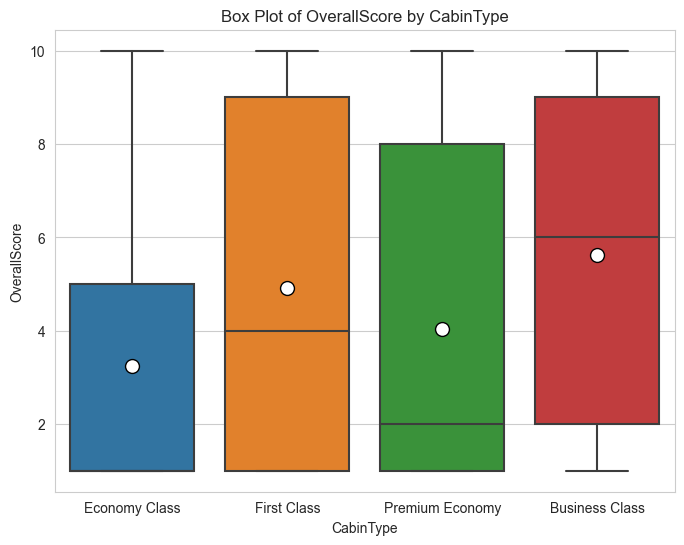

In [19]:
plt.figure(figsize=(8, 6))  # Set the figure size
custom_marker = dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=10)
sns.boxplot(x='CabinType', y='OverallScore', showmeans=True, meanprops=custom_marker,  data=data_clean)
# Set plot labels and title
plt.xlabel('CabinType')
plt.ylabel('OverallScore')
plt.title('Box Plot of OverallScore by CabinType')
plt.show()

In [20]:
data_clean['TravelType'].value_counts()

TravelType
Solo Leisure      17577
Couple Leisure    11187
Family Leisure     9516
Business           7159
Name: count, dtype: int64

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


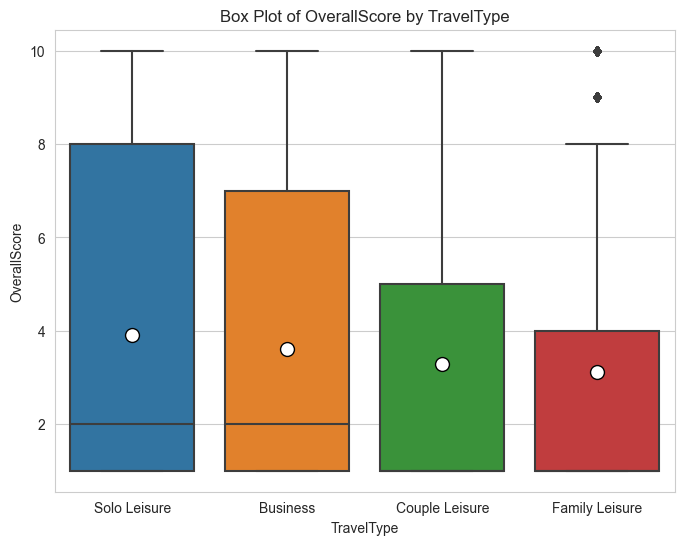

In [21]:
plt.figure(figsize=(8, 6))  # Set the figure size

sns.boxplot(x='TravelType', y='OverallScore', showmeans=True, meanprops=custom_marker, data=data_clean)

# Set plot labels and title
plt.xlabel('TravelType')
plt.ylabel('OverallScore')
plt.title('Box Plot of OverallScore by TravelType')
plt.show()

It calculates the weighted average of the 'OverallScore' for each airline, using the number of reviews as the weight. This approach was adopted because a simple average was misleadingly ranking airlines with a few positive reviews as the best.

In [22]:
data_clean['AirlineName'].value_counts()

AirlineName
American Airlines    2427
United Airlines      1848
Spirit Airlines      1826
Frontier Airlines    1504
Delta Air Lines      1152
                     ... 
Air Rarotonga           1
Maya Island Air         1
Air Cote d'Ivoire       1
SVG Air                 1
Kam Air                 1
Name: count, Length: 459, dtype: int64

In [23]:
# Calculate the average overall score for each airline
airline_scores = data_clean.groupby('AirlineName')['OverallScore'].mean()
# Group by airline and count the number of reviews
review_counts = data_clean['AirlineName'].value_counts()
# Calculate the weighted average for each airline
weighted_averages = (airline_scores * review_counts) / review_counts.sum()
# Find the top 5 airlines by weighted average
top_5_airlines_indices = weighted_averages.sort_values(ascending=False).head(5).index
# Extract their average scores
top_5_average_scores = airline_scores.loc[top_5_airlines_indices]

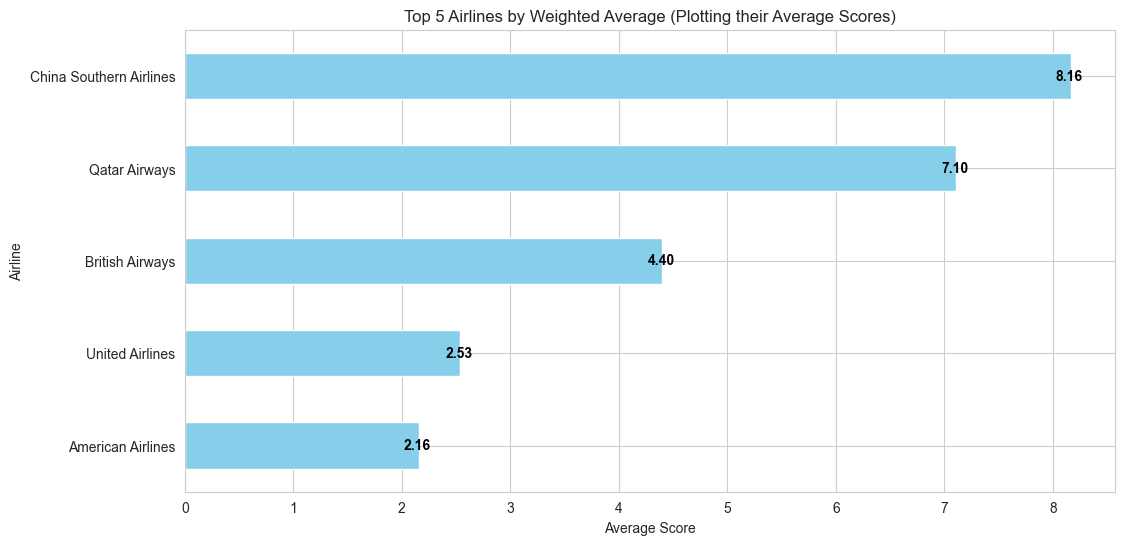

In [24]:
plt.figure(figsize=(12, 6))
bars = top_5_average_scores.sort_values(ascending=True).plot(kind='barh', color='skyblue')

# Annotate each bar with its value
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width - 0.01,  # set the text at 0.01 left of the bar
             bar.get_y() + bar.get_height() / 2,  # get Y coordinate + X coordinate / 2
             '{:.2f}'.format(width),  # format the value
             ha='center', va='center',
             color='black', weight='bold')

plt.title('Top 5 Airlines by Weighted Average (Plotting their Average Scores)')
plt.xlabel('Average Score')
plt.ylabel('Airline')
plt.show()

In [25]:
# Correlation matrix
numeric_columns = data_clean.select_dtypes(include='number')
corr_matrix = numeric_columns.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

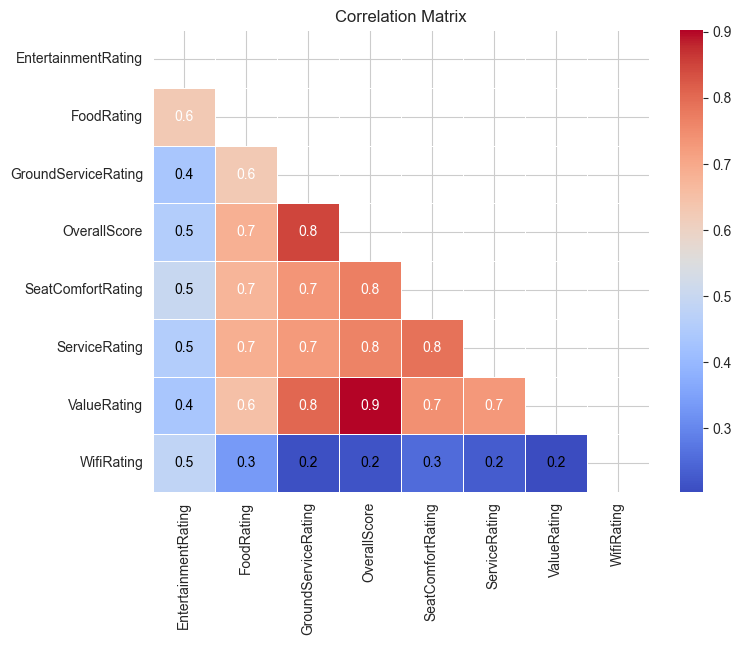

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
for i in range(len(corr_matrix)):
    for j in range(i):
        plt.text(j+0.5, i+0.5, format(corr_matrix.iloc[i, j], '.1f'),
                 ha='center', va='center',
                 color="black" if -0.5 < corr_matrix.iloc[i, j] < 0.5 else "white")
plt.title('Correlation Matrix')
plt.show()

### Client Satistafaction
To extract insights regarding client satisfaction, a new column will be created. Clients will be segmented into the following three categories based on the rating scale:
1-4: Not satisfied customers
5-7: Satisfied customers
8-10: Highly satisfied customers

In [27]:
def map_satisfaction(score):
    if score <= 4:
        return 'Not satisfied'
    elif 5 <= score <= 7:
        return 'Satisfied'
    elif 8 <= score <= 10:
        return 'Highly satisfied'
    else:
        return 'Unknown'  # Handle any other cases if necessary

In [28]:
# Apply the function to create the new 'SatisfactionLevel' column
data_clean['SatisfactionLevel'] = data_clean['OverallScore'].apply(map_satisfaction)

C:\Users\andre\AppData\Local\Temp\ipykernel_62412\4243929844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['SatisfactionLevel'] = data_clean['OverallScore'].apply(map_satisfaction)


In [29]:
data_clean['SatisfactionLevel'].value_counts()

SatisfactionLevel
Not satisfied       31470
Highly satisfied     9755
Satisfied            4216
Name: count, dtype: int64

In [30]:
# Percentage of user satisfaction
data_clean['SatisfactionLevel'].value_counts(normalize=True) * 100

SatisfactionLevel
Not satisfied       69.254638
Highly satisfied    21.467397
Satisfied            9.277965
Name: proportion, dtype: float64

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

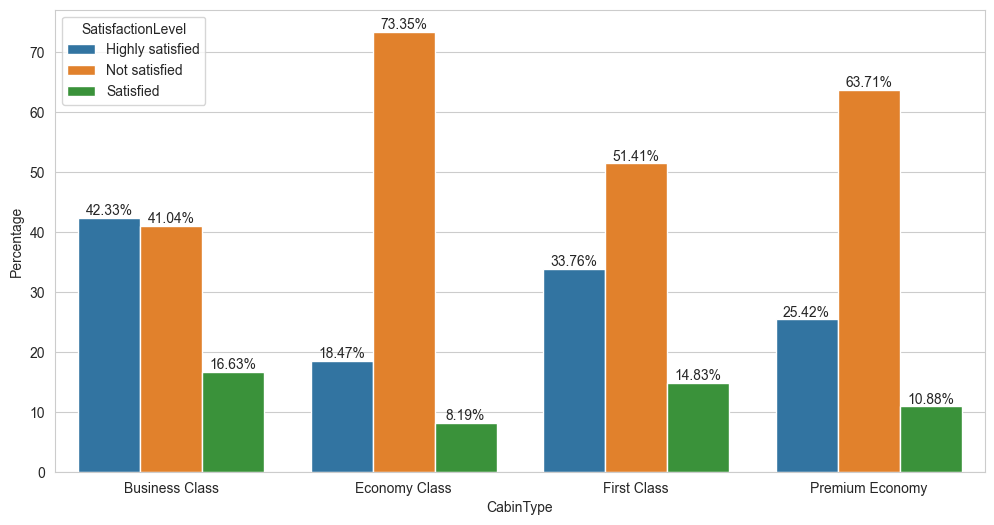

In [31]:
plt.figure(figsize=(12, 6))
# Calculate the total count for each 'CabinType'
cabin_counts = data_clean['CabinType'].value_counts()
# Create a new DataFrame with normalized percentages
normalized_data = data_clean.groupby(['CabinType', 'SatisfactionLevel']).size().reset_index(name='Count')
normalized_data['Percentage'] = normalized_data.groupby('CabinType')['Count'].transform(lambda x: (x / x.sum()) * 100)
ax = sns.barplot(data=normalized_data, x='CabinType', y='Percentage', hue='SatisfactionLevel', dodge=True)
# Annotate the bars with percentages
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

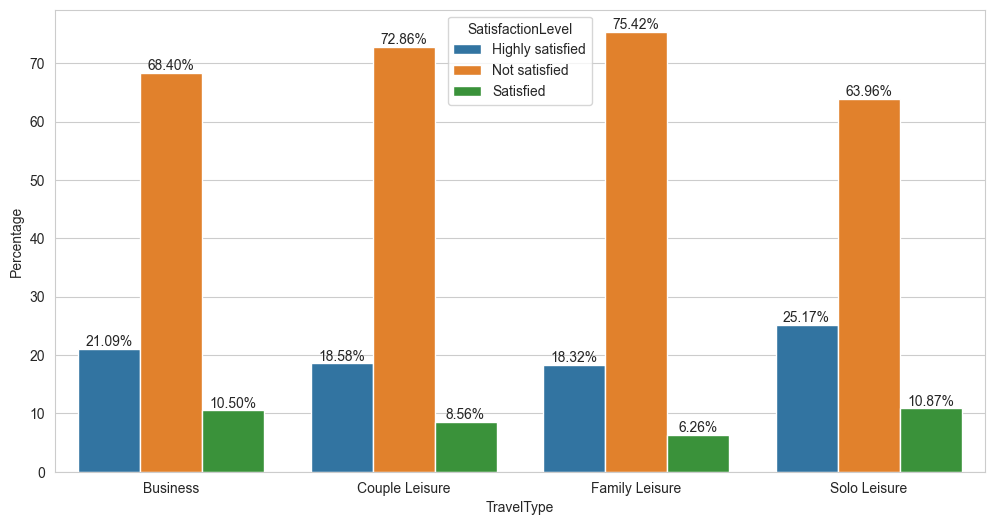

In [32]:
plt.figure(figsize=(12, 6))
# Calculate the total count for each 'TravelType'
travel_type_counts = data_clean['TravelType'].value_counts()
# Create a new DataFrame with normalized percentages
normalized_data = data_clean.groupby(['TravelType', 'SatisfactionLevel']).size().reset_index(name='Count')
normalized_data['Percentage'] = normalized_data.groupby('TravelType')['Count'].transform(lambda x: (x / x.sum()) * 100)
ax = sns.barplot(data=normalized_data, x='TravelType', y='Percentage', hue='SatisfactionLevel', dodge=True)
# Annotate the bars with percentages
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

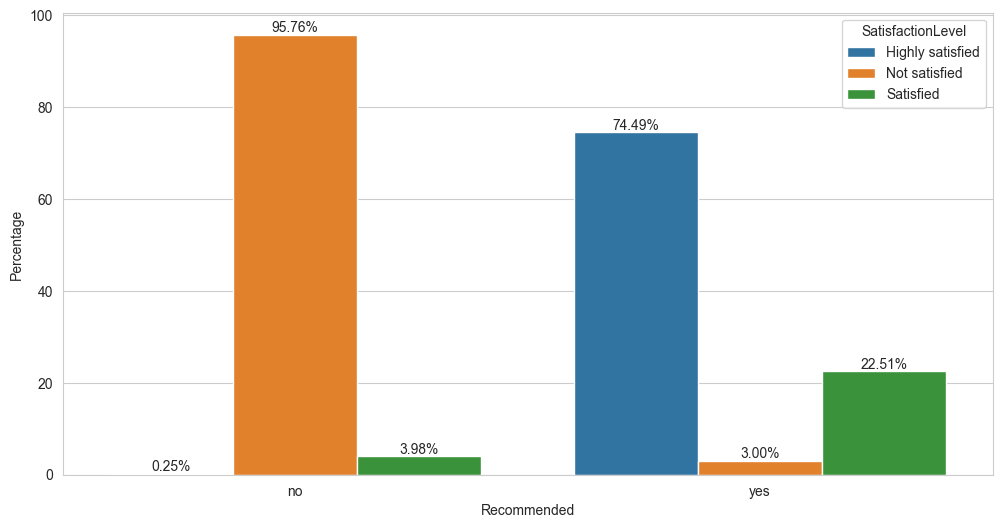

In [33]:
plt.figure(figsize=(12, 6))
# Calculate the total count for each 'TravelType'
recommended_counts = data_clean['Recommended'].value_counts()
# Create a new DataFrame with normalized percentages
normalized_data = data_clean.groupby(['Recommended', 'SatisfactionLevel']).size().reset_index(name='Count')
normalized_data['Percentage'] = normalized_data.groupby('Recommended')['Count'].transform(lambda x: (x / x.sum()) * 100)
ax = sns.barplot(data=normalized_data, x='Recommended', y='Percentage', hue='SatisfactionLevel', dodge=True)
# Annotate the bars with percentages
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

### Topic Modelling with LDA

Based on the previous findings, it is evident that most of the customers are not satisfied, even in the business or first-class cabin. The airlines have decided to take a more serious approach to address these reviews in order to increase the percentage of satisfaction and gain more loyal customers in the future.

To achieve this, it has been decided to implement topic modeling into the texts. So, once a review is registered, it will be classified based on its content and sent to the corresponding department to gather more information about the user's feedback and to create or propose improvements in the services.

In [34]:
import re
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from nltk.corpus import wordnet
from wordcloud import WordCloud
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
# Taking into account the previous analysis, we will only use the reviews of the not satisfied customers
not_satisfied_df = data_clean[data_clean['SatisfactionLevel'] == 'Not satisfied']

In [36]:
def clean_reviews(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and the word "flight"
    stop_words = set(stopwords.words('english'))
    stop_words.add("flight")
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the words (optional, but can improve results in many cases)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Return cleaned text
    return ' '.join(tokens)

In [37]:
def get_wordnet_pos(tag):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [38]:
# Apply cleaning and string type conversion to the 'Review' column
not_satisfied_df['Review_clean'] = not_satisfied_df['Review'].astype(str).apply(clean_reviews)
# Combine all cleaned reviews into a single text for word cloud generation
all_reviews = ' '.join(not_satisfied_df['Review_clean'])
# Tokenize and POS tag
tokens = nltk.word_tokenize(all_reviews)
tags = nltk.pos_tag(tokens)

C:\Users\andre\AppData\Local\Temp\ipykernel_62412\931887622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_satisfied_df['Review_clean'] = not_satisfied_df['Review'].astype(str).apply(clean_reviews)


In [39]:
def generate_word_cloud(words, max_words=200, title=""):
    wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=max_words).generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

In [40]:
# Separate nouns and adjectives
nouns = [word for word, tag in tags if tag in ['NN', 'NNS', 'NNP', 'NNPS']]
adjectives = [word for word, tag in tags if tag in ['JJ', 'JJR', 'JJS']]

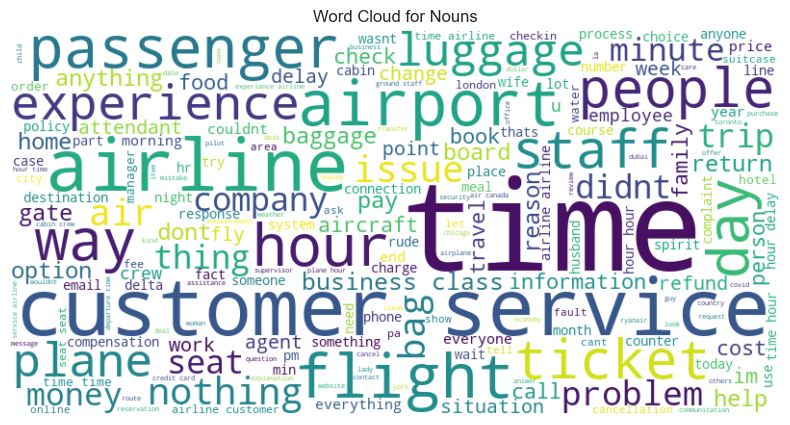

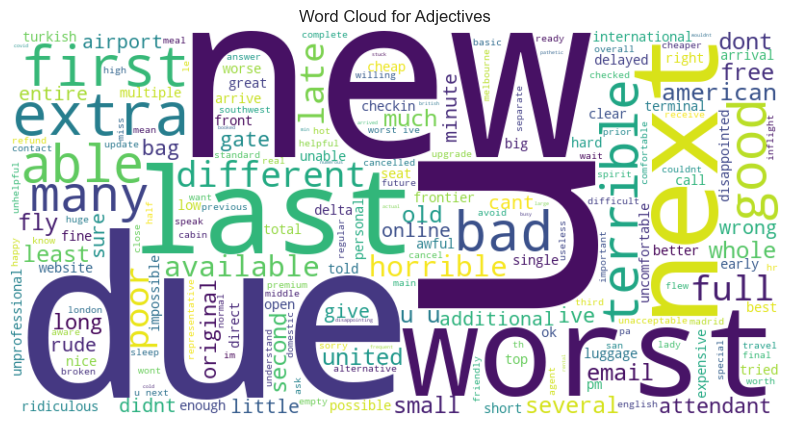

In [41]:
generate_word_cloud(nouns, title="Word Cloud for Nouns")
generate_word_cloud(adjectives, title="Word Cloud for Adjectives")

The Top2Vec model is an algorithm that combines the power of document clustering and topic modeling. It automatically detects topics present in the documents and generates jointly embedded topic, document, and word vectors. This allows the model to find topics even in small datasets with very few documents.

In [53]:
from top2vec import Top2Vec
from langdetect import detect

In [54]:
# Check the language of the reviews
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [55]:
cleaned_reviews = not_satisfied_df['Review_clean'].tolist()

In [56]:
english_reviews = [review for review in cleaned_reviews if is_english(review)]

In [58]:
cleaned_reviews = [str(document) for document in english_reviews]
len(cleaned_reviews)

31226

In [59]:
# Finding out optimal values for Top2Vec parameters
min_count = 0
embedding_model = 'universal-sentence-encoder'
speed = 'deep-learn'
workers = 24

umap_args = {'n_neighbors': 50,
             'n_components': 20,
             'metric': 'cosine',
             'random_state': 42}

hdbscan_args = {'min_cluster_size': 20,
                'min_samples': 50,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

In [60]:
!pip install tensorflow_text
!pip install tensorflow_hub

import tensorflow_hub as hub    
import tensorflow_text as text 

You should consider upgrading via the 'C:\Users\andre\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\andre\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [61]:
!pip install top2vec[sentence_encoders]

You should consider upgrading via the 'C:\Users\andre\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [62]:
# Run Top2Vec with the suggested parameter values

model = Top2Vec(cleaned_reviews,
                speed=speed,
                workers=workers,
                min_count=min_count,
                embedding_model=embedding_model,
                umap_args=umap_args,
                hdbscan_args=hdbscan_args)

# Getting the optimal number of topics
num_topics = model.get_num_topics()

# Printing the optimal number of topics
print("Optimal number of topics:", num_topics)

2023-09-27 22:26:03,888 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-09-27 22:26:06,986 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-09-27 22:26:14,281 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-09-27 22:26:29,350 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {se

Optimal number of topics: 17


In [63]:
# Getting the optimal number of topics
num_topics = model.get_num_topics()

# Printing the optimal number of topics
print("Optimal number of topics:", num_topics)

# Retrieve the topics
topic_words, _, _ = model.get_topics(num_topics)

# Print each topic
for i, words in enumerate(topic_words):
    print(f"Topic {i + 1}: {', '.join(words)}")

Optimal number of topics: 17
Topic 1: westjet, airline, qantas, jetblue, precheck, airtran, airasia, overbooked, nonrefundable, jetstar, inflight, refunding, rebook, overbooking, refunded, airmiles, eticket, cancelation, allegiant, airliner, avios, cathay, lufthansa, layover, refundable, ryanair, ontime, airfare, iah, cancellation, orbitz, turbulence, cancelling, reimbursement, stewardess, flown, disembark, turbulance, cancelled, embraer, megabus, delaying, easyjet, tardiness, lingus, punctuality, flew, inconvenienced, jetlag, ohare
Topic 2: legroom, airasia, overbooked, cathay, inflight, qantas, airline, aeroflot, recline, westjet, stewardess, jetstar, klm, airtran, passagers, ryanair, lufthansa, overbooking, airhostess, etihad, jetblue, airliner, seating, easyjet, precheck, flown, embraer, rebook, punctuality, seater, seat, nonrefundable, asiana, turbulance, eticket, airbus, passenger, avios, samsonite, layover, turbulence, carryons, reclining, handpick, dreamliner, reclines, lingus,

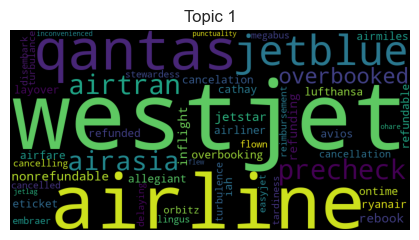

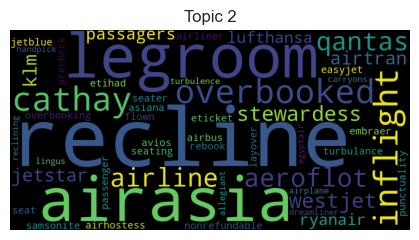

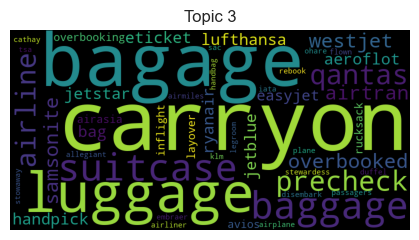

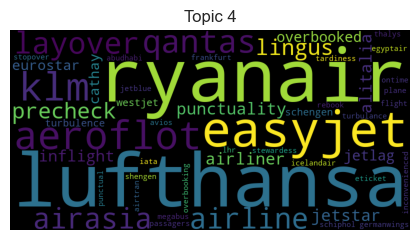

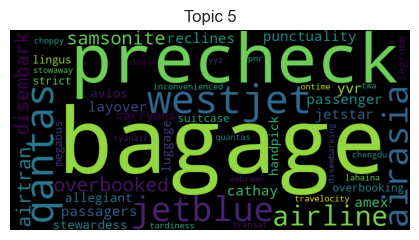

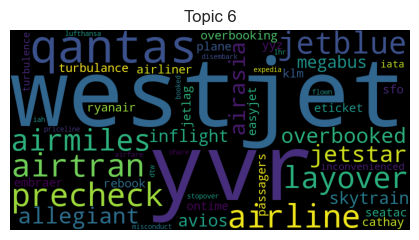

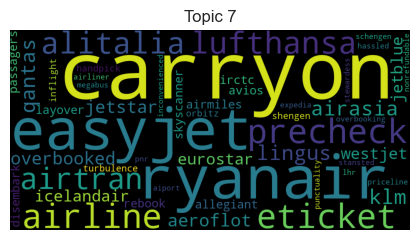

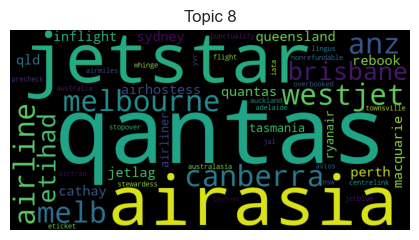

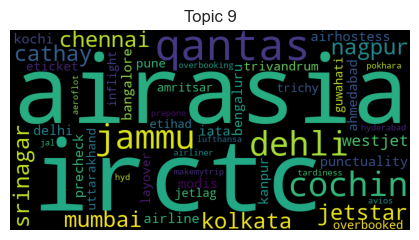

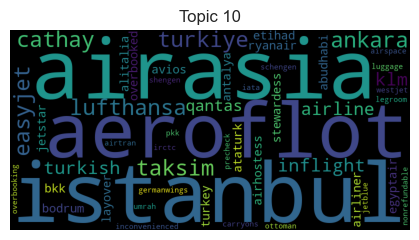

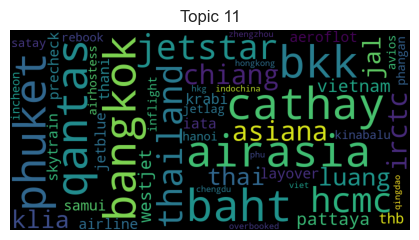

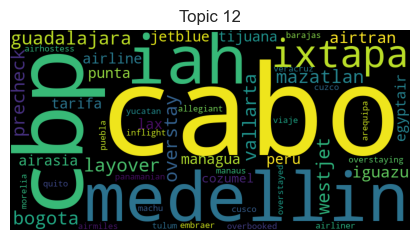

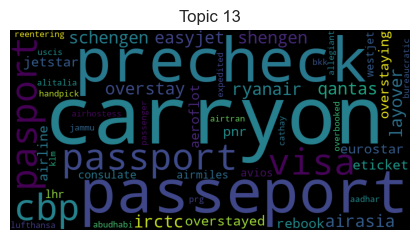

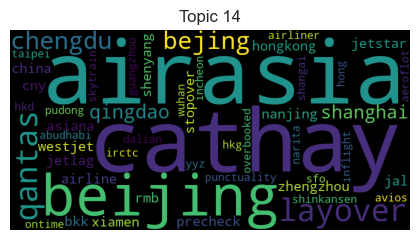

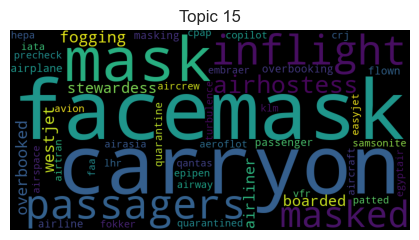

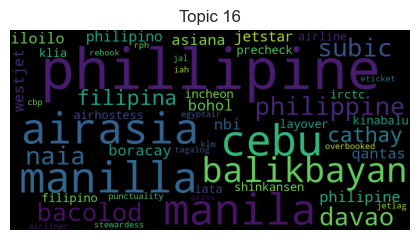

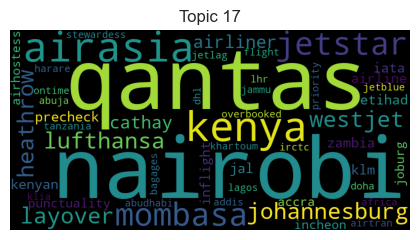

In [64]:
# Generating word clouds for each topic
for i, words in enumerate(topic_words):
    # Convert words list to single string
    words_str = ' '.join(words)

    wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='black', 
                min_font_size = 10).generate_from_text(words_str)
    
    # Ploting the word cloud for the topic
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f"Topic {i+1}")
    plt.show()